**Created by Sanskar Hasija**

**📈Exploring Time Series plots: Beginners Guide📈**

**16 NOVEMBER 2021**


# <center>📈EXPLORING TIME SERIES PLOTS: BEGINNERS GUIDE📈 </center>
## <center>If you find this notebook useful, support with an upvote👍</center>

### This notebook is an introductory notebook for visualizing and understanding different plots in time series data.
### Various topics covered in this notebook are :

### [1. Trend](#1) ###
### [2. Seasonality](#2) ##
### [3. Noise](#3) ###
### [4. Autocorrelation](#4) ###
### [5. Break Point](#5) ###
    

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

RANDOM_SEED = 12
time = np.arange(5*365 + 1 ) # 5 years

<a id="1"></a>
# <center>Trend</center>

In [2]:
def plot_series(time , series , format = "-" , start = 0, end = None , label = None , color = None):
    plt.plot(time[start:end] , series[start:end] , format , label = label , color = color)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize = 14)
    plt.grid(True)

def trend(time , slope = 0 ):
    return slope * time

### Trend Plot 1 

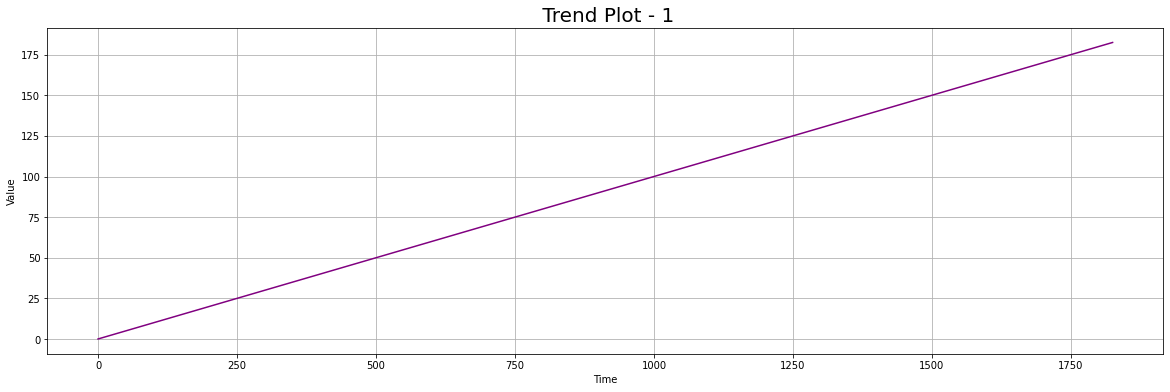

In [3]:
slope = 0.1
series = trend(time , slope)
plt.figure(figsize = (20,6))
plot_series(time , series , color = "purple")
plt.title(" Trend Plot - 1", fontdict = {'fontsize' : 20} )
plt.show()

### Trend Plot 2 

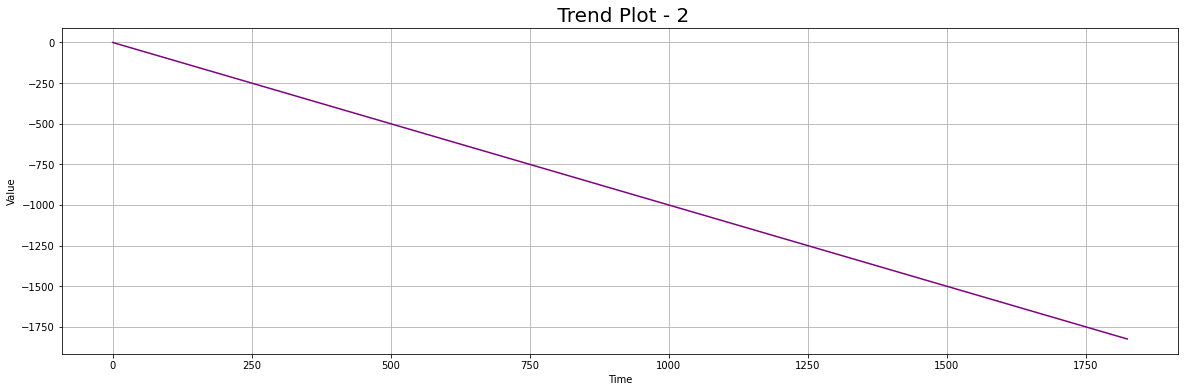

In [4]:
slope = -1
series = trend(time , slope)
plt.figure(figsize = (20,6))
plot_series(time , series , color = "purple")
plt.title(" Trend Plot - 2", fontdict = {'fontsize' : 20} )
plt.show()

<a id="2"></a>
# <center>Seasonality</center>

In [5]:
def seasonal_pattern(season_time):
    return np.where(season_time<0.45,
                   np.cos(season_time* 2 *np.pi),
                   1 / np.exp(3*season_time))

def seasonality(time , period , amplitude = 1 , phase = 0 ):
    season_time = ((time + phase) %  period ) / period
    return amplitude *seasonal_pattern(season_time)

### Seasonality Plot 1 

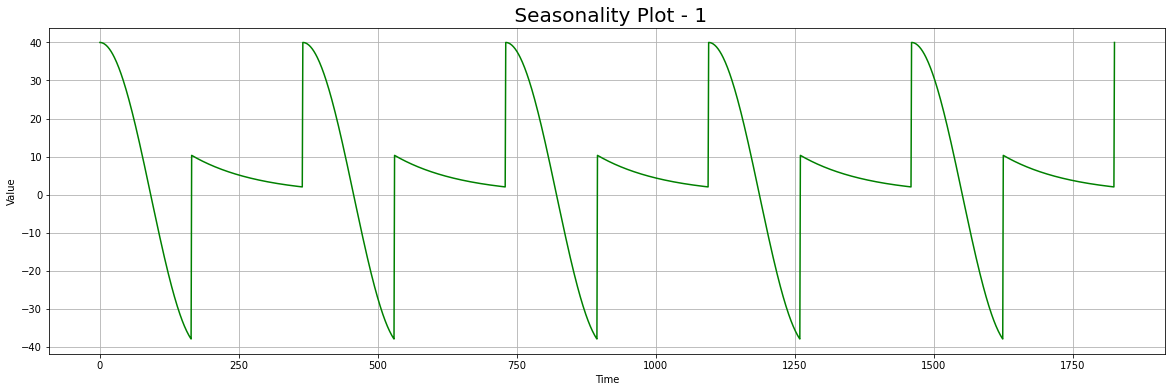

In [6]:
amplitude = 40
series = seasonality(time , period = 365, amplitude = amplitude , phase = 0 )
plt.figure(figsize=(20,6))
plot_series(time , series, color = "green")
plt.title(" Seasonality Plot - 1", fontdict = {'fontsize' : 20} )
plt.show()

### Seasonality Plot 2

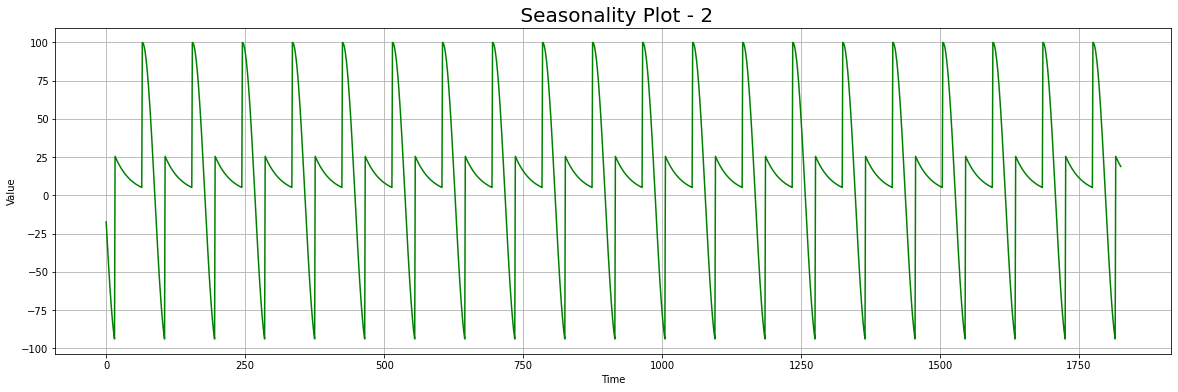

In [7]:
amplitude = 100
series = seasonality(time , period = 90, amplitude = amplitude , phase = 25 )
plt.figure(figsize=(20,6))
plot_series(time , series, color = "green")
plt.title(" Seasonality Plot - 2", fontdict = {'fontsize' : 20} )
plt.show()

## Seasonality + Trend
### Combined plot for seasonality and trend together

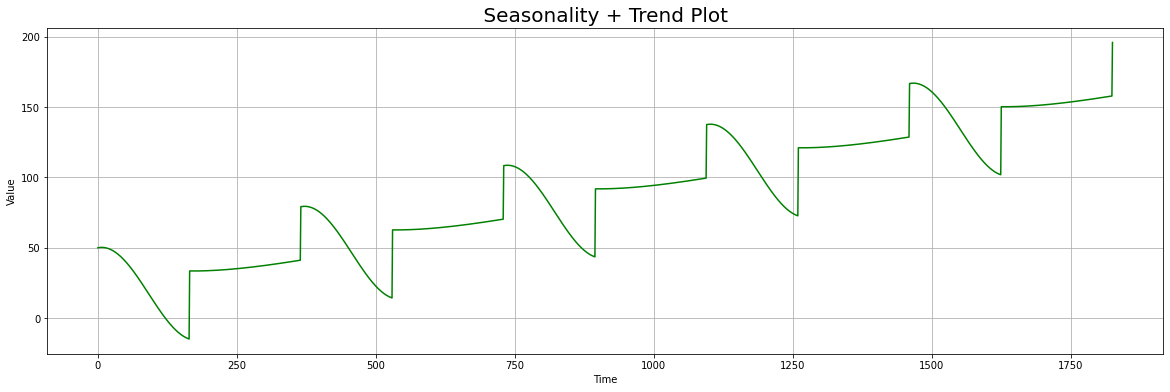

In [8]:
baseline = 10
slope = 0.08
amplitude = 40
series = baseline + trend(time , slope) + seasonality(time , period = 365 , amplitude= amplitude)
plt.figure(figsize=(20,6))
plot_series(time , series, color = "green")
plt.title(" Seasonality + Trend Plot ", fontdict = {'fontsize' : 20} )
plt.show()

<a id="3"></a>
# <center>Noise</center>

In [9]:
def white_noise(time, noise_level = 1 , seed = None):
    random = np.random.RandomState(seed)
    return random.random(len(time)) * noise_level

### Noise Plot 

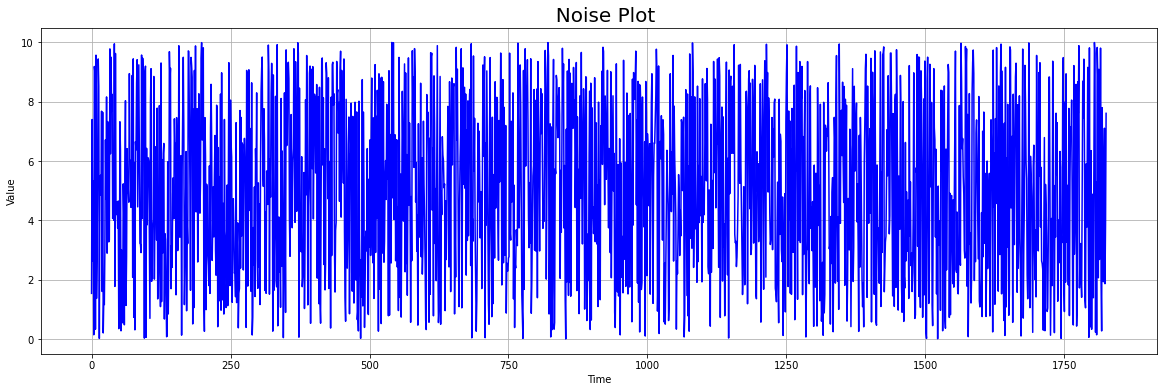

In [10]:
noise_level = 10
noise = white_noise(time , noise_level , seed = RANDOM_SEED)
plt.figure(figsize=(20,6))
plot_series(time , noise, color = "blue")
plt.title("  Noise Plot", fontdict = {'fontsize' : 20} )
plt.show()

## Noise + Seasonality + Trend 
### Combined plot for noise , seasonality and trend together

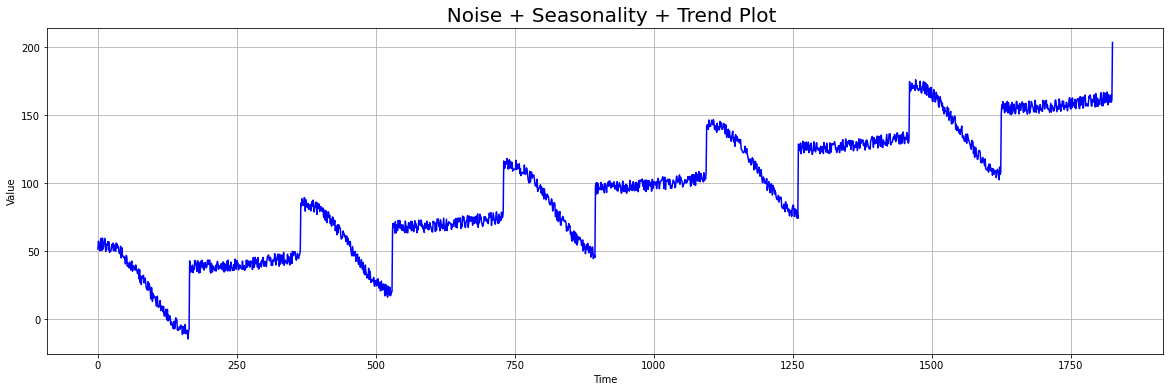

In [11]:
series = baseline + trend(time , slope) + seasonality(time , period = 365 , amplitude= amplitude)
series += white_noise(time , noise_level = 10 , seed = RANDOM_SEED)
plt.figure(figsize=(20,6))
plot_series(time , series, color = "blue")
plt.title("  Noise + Seasonality + Trend Plot", fontdict = {'fontsize' : 20} )
plt.show()

<a id="4"></a>
# <center>Autocorrelation</center>

In [12]:
def autocorrelation_1(time , amplitude , seed = None):
    rnd = np.random.RandomState(seed)
    a1 = 0.5
    a2 = -0.1
    rnd_ar = rnd.randn(len(time) + 50)
    rnd_ar[:50] = 100
    for step in range(50, len(time) + 50 ):
        rnd_ar[step] += a1 * rnd_ar[step - 50]
        rnd_ar[step] += a2 * rnd_ar[step - 33]
    return rnd_ar[50:] * amplitude

def autocorrelation_2(time, amplitude, seed=None):
    rnd = np.random.RandomState(seed)
    a1 = 0.8
    ar = rnd.randn(len(time) + 1)
    for step in range(1, len(time) + 1):
        ar[step] += a1 * ar[step - 1]
    return ar[1:] * amplitude

### Autocorrelation Plot 1

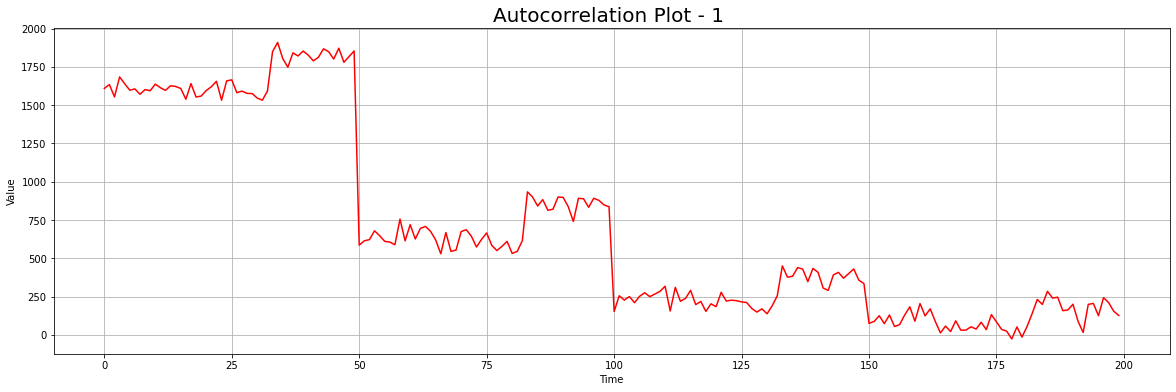

In [13]:
series = autocorrelation_1(time , amplitude , seed = RANDOM_SEED)
plt.figure(figsize=(20,6))
plot_series(time[:200] , series[:200] , color = "red" )
plt.title("Autocorrelation Plot - 1 ", fontdict = {'fontsize' : 20} )
plt.show()

### Autocorrelation Plot 2

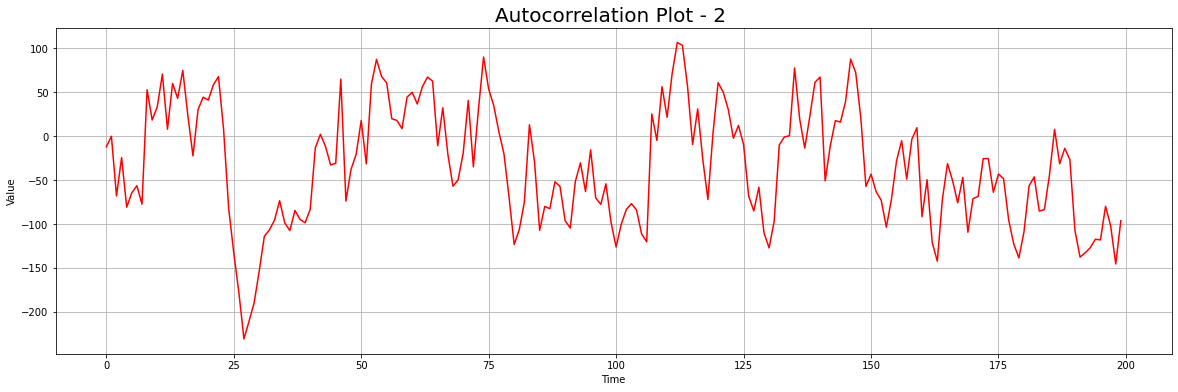

In [14]:
series = autocorrelation_2(time , amplitude , seed = RANDOM_SEED)
plt.figure(figsize=(20,6))
plot_series(time[:200] , series[:200] , color = "red")
plt.title("Autocorrelation Plot - 2 ", fontdict = {'fontsize' : 20} )
plt.show()

## Autocorrelation + Trend 
### Combined plot for Autocorrelation and trend together

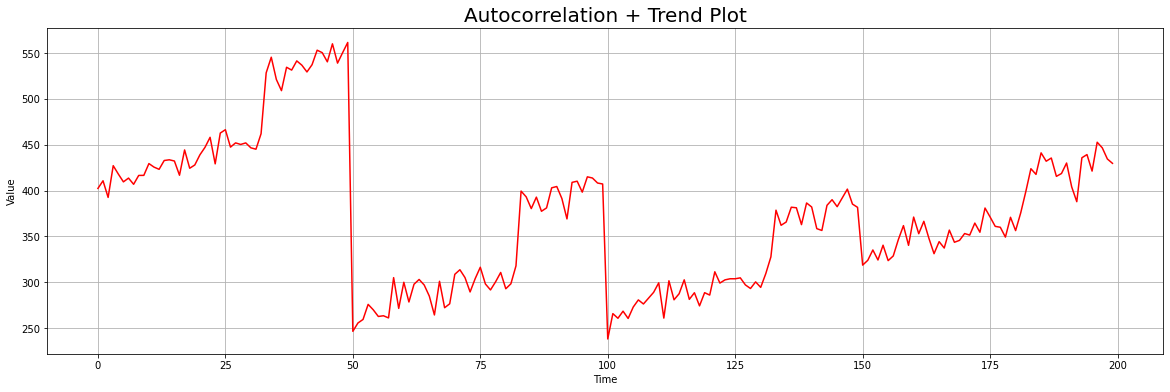

In [15]:
amplitude = 10
slope = 2
series = autocorrelation_1(time ,amplitude , seed = RANDOM_SEED) + trend(time , slope)
plt.figure(figsize=(20,6))
plot_series(time[:200], series[:200] , color = "red")
plt.title("Autocorrelation + Trend Plot", fontdict = {'fontsize' : 20} )
plt.show()

## Autocorrelation + Seasonality  + Trend 
### Combined plot for Autocorrelation, seasonality and trend together

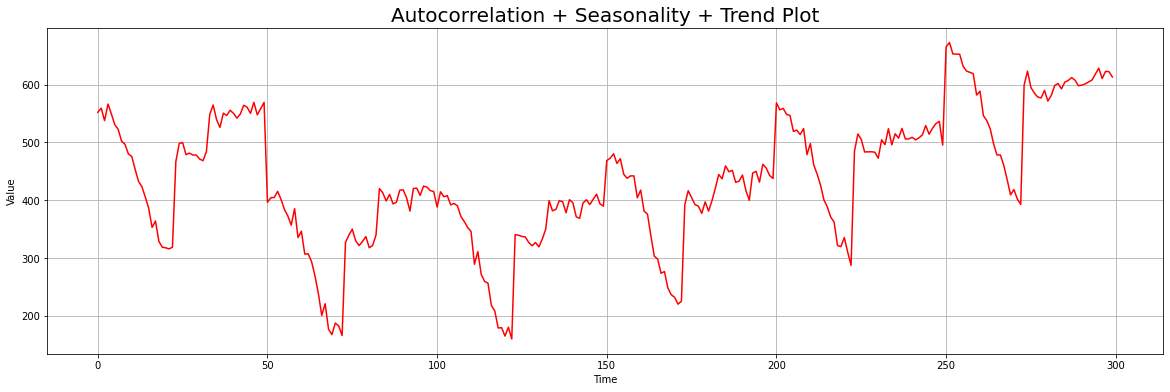

In [16]:
amplitude = 10
slope = 2
series = autocorrelation_1(time , amplitude , seed = RANDOM_SEED ) + seasonality(time , period= 50 , amplitude = 150) + trend(time , slope)
plt.figure(figsize=(20,6))
plot_series(time[:300], series[:300] , color = "red")
plt.title("Autocorrelation + Seasonality + Trend Plot", fontdict = {'fontsize' : 20} )
plt.show()

## Autocorrelation + Seasonality  + Noise + Trend 
### Combined plot for Autocorrelation, seasonality, noise and trend together

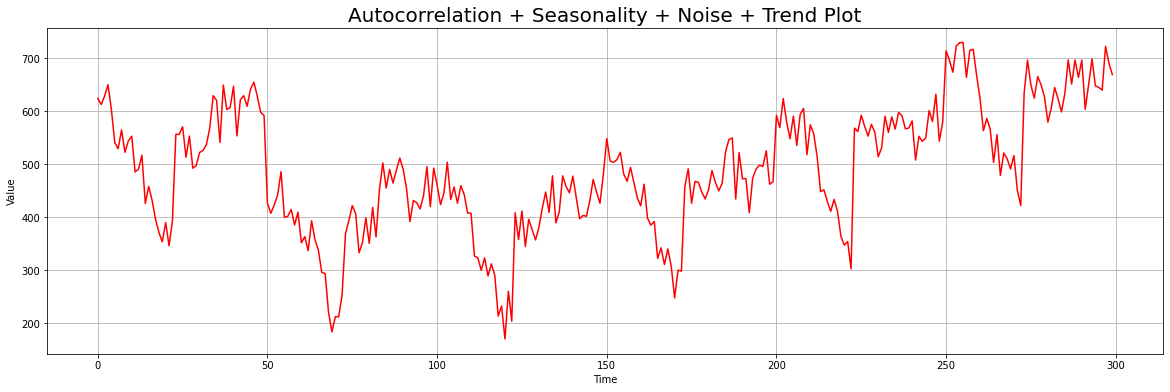

In [17]:
amplitude = 10
slope = 2
series = autocorrelation_1(time , amplitude , seed = RANDOM_SEED ) + seasonality(time , period= 50 , amplitude = 150) + trend(time , slope)
series += white_noise(time , noise_level=100)
plt.figure(figsize=(20,6))
plot_series(time[:300], series[:300] , color = "red")
plt.title("Autocorrelation + Seasonality + Noise + Trend Plot", fontdict = {'fontsize' : 20} )
plt.show()

<a id="5"></a>
# <center>Break Point</center>

## Break Point plot at time = 200
### Combined plot for Autocorrelation, seasonality, noise ,trend and break point together

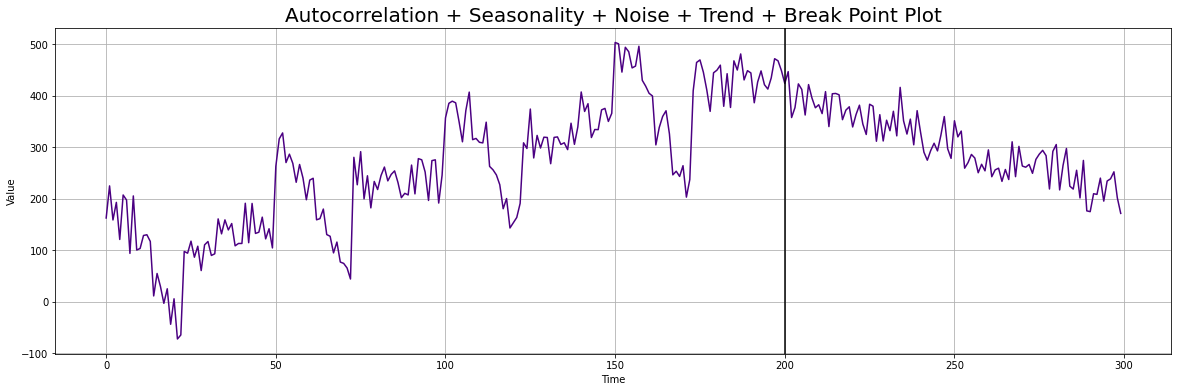

In [18]:
amplitude1 = 10
amplitude2 = 5
slope1 = 2
slope2 = -2
series1 = autocorrelation_2(time, amplitude1, seed=RANDOM_SEED) + seasonality(time, period=50, amplitude=150) + trend(time, slope1)
series2 = autocorrelation_2(time, amplitude2, seed=RANDOM_SEED) + seasonality(time, period=50, amplitude=2) + trend(time, slope2) + 750+  white_noise(time , 30) 
series1[200:] = series2[200:]
series1 += white_noise(time, noise_level=100 , seed= RANDOM_SEED)
plt.figure(figsize=(20,6))
plot_series(time[:300], series1[:300] , color = "indigo")
plt.axvline(x=200 , color = "black")
plt.title("Autocorrelation + Seasonality + Noise + Trend + Break Point Plot", fontdict = {'fontsize' : 20} )
plt.show()